In [1]:
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
scale_factor = 4
hr_img_folder = r'C:\Users\Acer\OneDrive\Desktop\Computer vision\GAN_QR\data\hr_img'
lr_img_folder = r'C:\Users\Acer\OneDrive\Desktop\Computer vision\GAN_QR\data\lr_img'  # Thư mục lưu ảnh đã được scale

In [3]:
# Đảm bảo thư mục lưu ảnh LR tồn tại
os.makedirs(lr_img_folder, exist_ok=True)

In [4]:
# Lấy danh sách các tệp ảnh HR
hr_img_files = [os.path.join(hr_img_folder, f) for f in os.listdir(hr_img_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]
data_folder = r'C:\Users\Acer\OneDrive\Desktop\Computer vision\GAN_QR\data'

In [5]:
# Hàm giảm kích thước ảnh
def downsample_image(image, scale_factor):
    h, w = image.shape[:2]
    new_h, new_w = h // scale_factor, w // scale_factor
    return cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_LINEAR)

In [6]:
# Xử lý ảnh HR để tạo ảnh LR và lưu vào thư mục lr_img
for hr_img_path in hr_img_files:
    hr_img = cv2.imread(hr_img_path)
    lr_img = downsample_image(hr_img, scale_factor)
    lr_img_path = os.path.join(lr_img_folder, os.path.basename(hr_img_path))
    cv2.imwrite(lr_img_path, lr_img)

In [7]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
hr_train_files, hr_test_files = train_test_split(hr_img_files, test_size=0.2, random_state=42)
train_file_path = os.path.join(data_folder, 'hr_train_files.txt')
test_file_path = os.path.join(data_folder, 'hr_test_files.txt')

In [8]:
# Lưu danh sách tệp huấn luyện và kiểm tra vào file
with open(train_file_path, 'w') as f:
    for item in hr_train_files:
        f.write("%s\n" % item)

with open(test_file_path, 'w') as f:
    for item in hr_test_files:
        f.write("%s\n" % item)

In [9]:
# Hàm hiển thị ảnh
def show_image(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

Hiển thị ảnh độ phân giải cao:


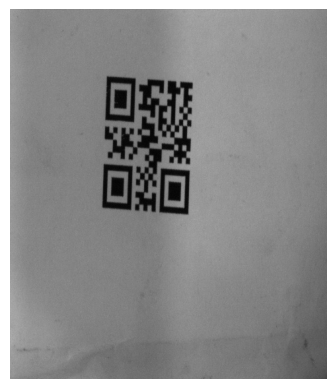

Hiển thị ảnh độ phân giải thấp:


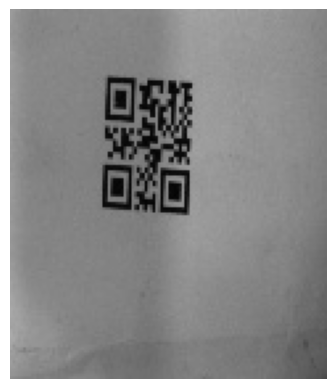

In [11]:
# Hiển thị một số ảnh mẫu để kiểm tra
print("Hiển thị ảnh độ phân giải cao:")
show_image(hr_img_files[1])

print("Hiển thị ảnh độ phân giải thấp:")
show_image(os.path.join(lr_img_folder, os.path.basename(hr_img_files[1])))